In [1]:
import pandas as pd
migrations = pd.read_excel("manual/confirmed-migrations-2014.xlsx", parse_dates=["startCommitTime", "endCommitTime"])
print("# migrations = {}, # commit pairs = {}, # same commits = {}, # repos = {}, # rules = {}".format(
    len(migrations), 
    len(set(zip(migrations["startCommit"], migrations["endCommit"]))),
    len([x for x, y in set(zip(migrations["startCommit"], migrations["endCommit"])) if x == y]),
    len(set(migrations["repoName"])),
    len(set(zip(migrations["fromLib"], migrations["toLib"])))
))

# migrations = 5247, # commit pairs = 1106, # same commits = 992, # repos = 712, # rules = 317


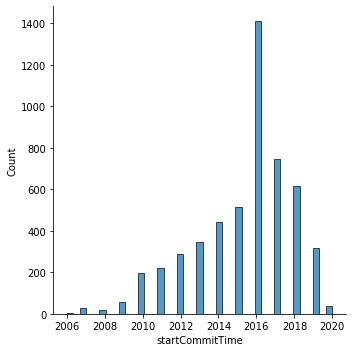

In [4]:
import seaborn as sns
sns.displot(migrations["startCommitTime"].map(lambda x: x.date().year))

In [3]:
from collections import Counter
sorted(
    Counter(zip(migrations["fromLib"], migrations["toLib"])).items(),
    key=lambda x: x[1],
    reverse=True
)[0:20]

[(('org.slf4j:slf4j-log4j12', 'org.apache.logging.log4j:log4j-core'), 508),
 (('org.slf4j:slf4j-log4j12', 'org.apache.logging.log4j:log4j-slf4j-impl'),
  507),
 (('org.slf4j:slf4j-log4j12', 'org.apache.logging.log4j:log4j-api'), 456),
 (('org.slf4j:slf4j-log4j12', 'ch.qos.logback:logback-classic'), 273),
 (('log4j:log4j', 'org.apache.logging.log4j:log4j-slf4j-impl'), 259),
 (('log4j:log4j', 'org.slf4j:slf4j-api'), 224),
 (('commons-httpclient:commons-httpclient',
   'org.apache.httpcomponents:httpclient'),
  181),
 (('commons-logging:commons-logging', 'org.slf4j:slf4j-api'), 164),
 (('log4j:log4j', 'ch.qos.logback:logback-classic'), 159),
 (('org.slf4j:slf4j-api', 'org.apache.logging.log4j:log4j-api'), 111),
 (('junit:junit', 'org.testng:testng'), 95),
 (('commons-logging:commons-logging', 'org.slf4j:slf4j-log4j12'), 86),
 (('org.slf4j:slf4j-api', 'org.apache.logging.log4j:log4j-core'), 79),
 (('org.slf4j:slf4j-log4j12', 'ch.qos.logback:logback-core'), 76),
 (('org.mockito:mockito-all'